In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data = pd.read_csv('12.12.99 model NaBH4.csv')
data.info()
data.describe()
data = data.drop(index = 1)
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   NaBH4 Concentration          9 non-null      float64
 1   absolute maximum             9 non-null      float64
 2   absolute maximum wavelength  9 non-null      float64
 3   integral                     9 non-null      float64
dtypes: float64(4)
memory usage: 416.0 bytes


,NaBH4 Concentration,absolute maximum,absolute maximum wavelength,integral
0,0.15,0.090,395.5,22.208
2,0.25,0.138,395.5,39.697
3,0.25,0.187,397.5,34.805
4,0.35,0.097,396.5,23.650
5,0.53,0.476,425.0,79.140
6,0.53,0.485,402.0,66.637
7,0.75,0.459,412.5,68.150
8,1.06,0.590,405.5,83.542


In [3]:
concentrations = data.iloc[:,0]
absMax = data.iloc[:,1]
absMaxWave = data.iloc[:,2]
integral = data.iloc[:,3]

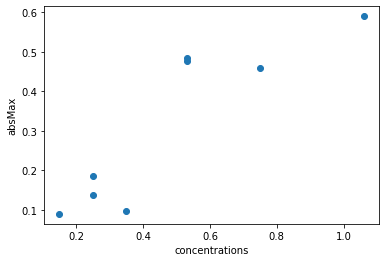

In [6]:
plt.scatter(concentrations,absMax)
plt.xlabel('concentrations')
plt.ylabel('absMax')
plt.show()

In [50]:
x = data.iloc[:,1:]
y = data.iloc[:,0]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [52]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [53]:
y_pred = lr.predict(X_test)


In [54]:
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

-2.1893683968172137
0.08249832919767194


In [55]:
print(y_pred)

[0.03522641 0.9682104  0.24663821]


In [56]:
print(y_test)


2    0.25
6    0.53
0    0.15
Name: NaBH4 Concentration, dtype: float64


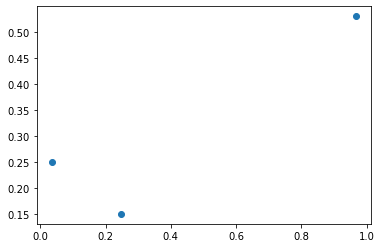

In [57]:
plt.scatter(y_pred,y_test)
plt.show()

In [58]:
print('salam')

salam


In [59]:
import tensorflow as tf



In [60]:
dpModel = tf.keras.models.Sequential()

dpModel.add(tf.keras.layers.Dense(units = 3,activation = 'relu'))
dpModel.add(tf.keras.layers.Dense(units = 4,activation = 'relu'))
dpModel.add(tf.keras.layers.Dense(units = 1,activation = 'relu'))

dpModel.compile(optimizer = 'adam',loss = 'mean_squared_error',metrics = 'accuracy')


In [61]:
dpModel.fit(X_train,y_train,batch_size = 1,epochs = 6)

Epoch 1/6
5/5 [==============================] - 0s 2ms/step - loss: 0.3618 - accuracy: 0.0000e+00
Epoch 2/6
5/5 [==============================] - 0s 1ms/step - loss: 0.3510 - accuracy: 0.0000e+00
Epoch 3/6
5/5 [==============================] - 0s 1ms/step - loss: 0.3425 - accuracy: 0.0000e+00
Epoch 4/6
5/5 [==============================] - 0s 997us/step - loss: 0.3322 - accuracy: 0.0000e+00
Epoch 5/6
5/5 [==============================] - 0s 1ms/step - loss: 0.3212 - accuracy: 0.0000e+00
Epoch 6/6
5/5 [==============================] - 0s 1ms/step - loss: 0.3119 - accuracy: 0.0000e+00

In [62]:
print(dpModel.predict(sc.transform([[0.5,400,50]])))

[[0.02421752]]


In [63]:
y_pred = dpModel.predict(X_test)
print(y_pred)
print(y_test)
print(X_test)

[[0.08196551]
 [0.02532114]
 [0.12217171]]
2    0.25
6    0.53
0    0.15
Name: NaBH4 Concentration, dtype: float64
[[-1.19544596 -1.12827891 -0.75146408]
 [ 0.65808285 -0.51199211  0.36329343]
 [-1.45184188 -1.12827891 -1.47514611]]
